# **Introduction**


The purpose of the project is to explore world happiness data, revealing the correlations between key metrics including expectancy, freedome, GDP and overall happiness score. In addition, we intend to uncover trends in happiness score across different countries over the years. As I'm living in Finland, I'm particularly intrigued in also to dive deeper into the happiness data of the country that is called the happiest in the world for 5 consecutive years. We'll use mainly 2 datasets:
- World happiness report 2013 to explore deeply intro 2023 happiness metrics
- World happiness index 2013-2023 to see the trends of happiness index across countries over the whole decade

In [1]:
#Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

> World happiness index 2013-2023

In [2]:
world_index = pd.read_csv('/kaggle/input/world-happiness-report-2013-2023/WorldHappinessIndex2013-2023.csv')
world_index.head(10).style

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040000,143.000000
1,Singapore,2013,6.546000,30.000000
2,Comoros,2013,3.851000,149.000000
3,Sierra Leone,2013,4.318000,127.000000
4,Congo,2013,nan,nan
5,Serbia,2013,4.813000,106.000000
6,Congo Brazzaville,2013,4.297000,129.000000
7,Senegal,2013,3.959000,147.000000
8,Congo Kinshasa,2013,4.578000,117.000000
9,Saudi Arabia,2013,6.480000,33.000000


In [3]:
world_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1670 non-null   object 
 1   Year     1670 non-null   int64  
 2   Index    1523 non-null   float64
 3   Rank     1523 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 52.3+ KB


In [4]:
world_index.isna().sum()

Country      0
Year         0
Index      147
Rank       147
dtype: int64

As there are 147 countries that have the Index and Rank metrics missing and the countries are quite random so we'll drop the observations with missing values to keep the data consistant and easier to work with.

In [5]:
world_index = world_index.dropna()

> World happiness report 2013

In [6]:
world_2023 = pd.read_csv('/kaggle/input/world-happiness-report-2013-2023/World Happiness Report 2023.csv')

In [7]:
world_2023.head(10).style

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804000,0.036000,7.875000,7.733000,10.792000,0.969000,71.150000,0.961000,-0.019000,0.182000,1.778000,1.888000,1.585000,0.535000,0.772000,0.126000,0.535000,2.363000
1,Denmark,7.586000,0.041000,7.667000,7.506000,10.962000,0.954000,71.250000,0.934000,0.134000,0.196000,1.778000,1.949000,1.548000,0.537000,0.734000,0.208000,0.525000,2.084000
2,Iceland,7.530000,0.049000,7.625000,7.434000,10.896000,0.983000,72.050000,0.936000,0.211000,0.668000,1.778000,1.926000,1.620000,0.559000,0.738000,0.250000,0.187000,2.250000
3,Israel,7.473000,0.032000,7.535000,7.411000,10.639000,0.943000,72.697000,0.809000,-0.023000,0.708000,1.778000,1.833000,1.521000,0.577000,0.569000,0.124000,0.158000,2.691000
4,Netherlands,7.403000,0.029000,7.460000,7.346000,10.942000,0.930000,71.550000,0.887000,0.213000,0.379000,1.778000,1.942000,1.488000,0.545000,0.672000,0.251000,0.394000,2.110000
5,Sweden,7.395000,0.037000,7.468000,7.322000,10.883000,0.939000,72.150000,0.948000,0.165000,0.202000,1.778000,1.921000,1.510000,0.562000,0.754000,0.225000,0.520000,1.903000
6,Norway,7.315000,0.044000,7.402000,7.229000,11.088000,0.943000,71.500000,0.947000,0.141000,0.283000,1.778000,1.994000,1.521000,0.544000,0.752000,0.212000,0.463000,1.829000
7,Switzerland,7.240000,0.043000,7.324000,7.156000,11.164000,0.920000,72.900000,0.891000,0.027000,0.266000,1.778000,2.022000,1.463000,0.582000,0.678000,0.151000,0.475000,1.870000
8,Luxembourg,7.228000,0.069000,7.363000,7.093000,11.660000,0.879000,71.675000,0.915000,0.024000,0.345000,1.778000,2.200000,1.357000,0.549000,0.710000,0.149000,0.418000,1.845000
9,New Zealand,7.123000,0.038000,7.198000,7.048000,10.662000,0.952000,70.350000,0.887000,0.175000,0.271000,1.778000,1.842000,1.544000,0.513000,0.672000,0.230000,0.471000,1.852000


Each column in the dataset corresponds to a distinct category and metric, and here's what each of them signifies:

* Ladder score: This metric represents overall happiness score or subjective well-being, along with its associated standard error, upperwhisker and lower whisker as upper quarter and lower quartile. It also includes the 95% confidence interval.

* Logged GDP per capita: This indicates a country's Gross Domestic Product divided by its population, reflecting how much each individual contributes to the country's economic output.

* Social support: This metric measures whether individuals have someone to rely on during challenging times, assessing the strength of social connections within a society.

* Healthy life expectancy: This assesses an individual's life expectancy while considering both physical and mental health, providing a holistic perspective on well-being.

* Freedom to make life choices: This metric gauges an individual's satisfaction with their ability to make life decisions and encompasses their freedom to exercise their human rights.

* Generosity: It evaluates an individual's willingness to be charitable, such as whether they've donated money to a charitable cause in the past month.

* Perception of corruption: This measures people's perceptions of corruption within their government and their trust in the integrity of government institutions and fellow citizens.

In [8]:
world_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

Same with the World Happiness Report 2023, we'll drop a few rows with missing values of all columns to make sure we have better and cleaner data to work with. The countries with missing values are random also so our analysis won't be subject to the bias error.

In [9]:
world_2023 = world_2023.dropna()

In [10]:
world_2023.describe().round()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0
mean,6.0,0.0,6.0,5.0,9.0,1.0,65.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
std,1.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
min,2.0,0.0,2.0,2.0,6.0,0.0,52.0,0.0,-0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
25%,5.0,0.0,5.0,4.0,9.0,1.0,61.0,1.0,-0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
50%,6.0,0.0,6.0,6.0,10.0,1.0,66.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
75%,6.0,0.0,6.0,6.0,11.0,1.0,69.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0
max,8.0,0.0,8.0,8.0,12.0,1.0,77.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,3.0


#  Exploratory Data Analysis - Index and Ranking of world countries from 2013 to 2023:


- Index score refers to the number that measures the level of happiness of a country
- Ranking refers to the position of a particular country in a list that ranks countries by index score

> Average index score from 2013-2023

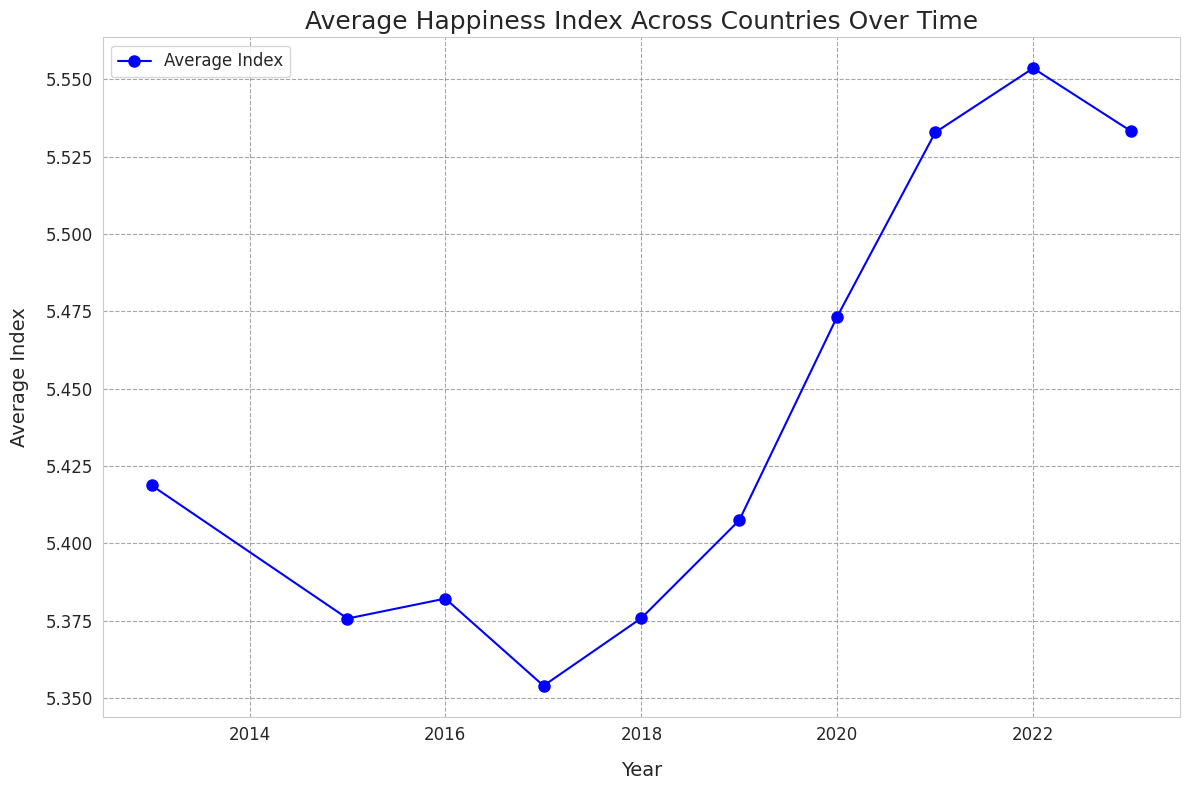

In [11]:
#Average index 
world_index['Year'] = pd.to_datetime(world_index['Year'], format='%Y')
average_index_by_year = world_index.groupby('Year')['Index'].mean()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) 
plt.plot(average_index_by_year.index, average_index_by_year.values, marker='o', markersize=8, color='blue', label='Average Index')
plt.xlabel('Year', fontsize=14, labelpad=12)  
plt.ylabel('Average Index', fontsize=14, labelpad=12) 
plt.title('Average Happiness Index Across Countries Over Time', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()

2017 saw the all-time low of the average index in the world in the past decade. Political conflicts, some social unrest events and climate crisis like hurricanes, terrorist bombs, et, cause the overall low happiness level across many countries. The average index has increased drastically since then up to now and it's interesting to see the pandemic, massive layoffs and fears of recessions haven't made the happiness scores dive down.

> Index over 10 years by country

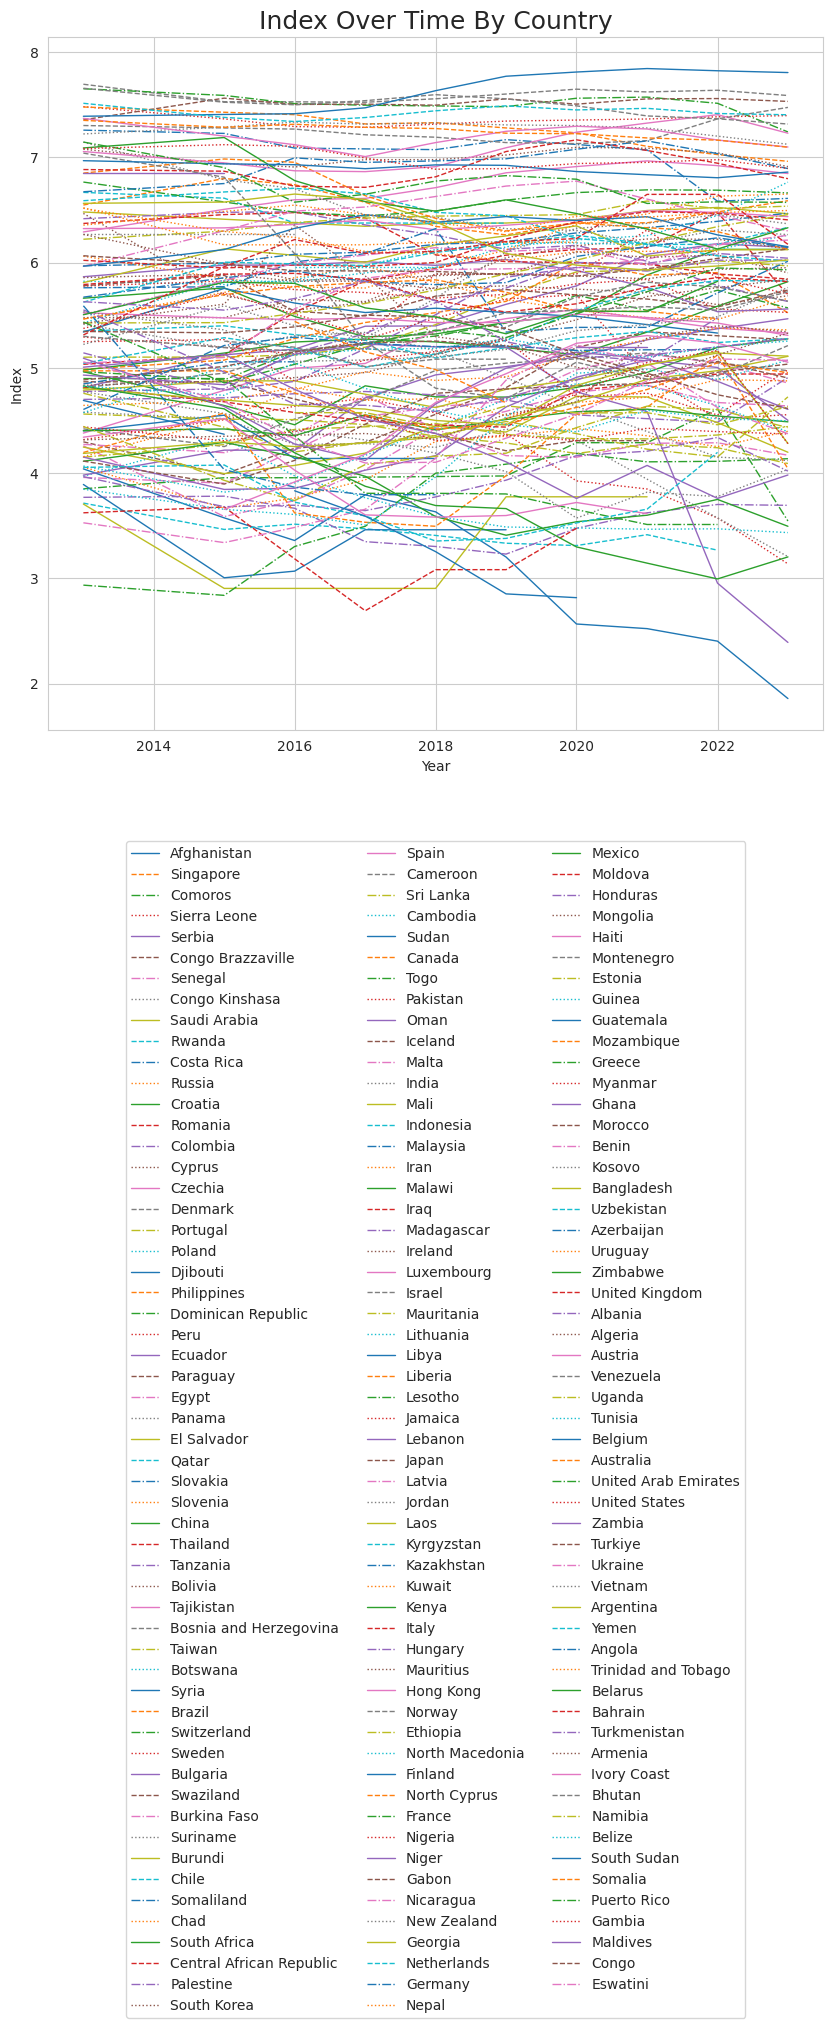

In [12]:
#index score by country
world_index['Year'] = pd.to_datetime(world_index['Year'], format='%Y')
countries = world_index['Country'].unique()
plt.figure(figsize=(10, 9))
color = 'blue'
line_styles = ['-', '--', '-.', ':']

for i, country in enumerate(countries):
    country_data = world_index[world_index['Country'] == country]
    line_style = line_styles[i % len(line_styles)]  
    plt.plot(country_data['Year'], country_data['Index'], label=country, linestyle=line_style, linewidth=1)

plt.xlabel('Year')
plt.ylabel('Index')
plt.title('Index Over Time By Country', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  
plt.show()

The index scores for different countries over time show a varied pattern. While some countries maintain relatively stable index scores, others experience significant fluctuations in their happiness index scores across the years.

# Exploratory Data Analysis - Happiness index score of Finland

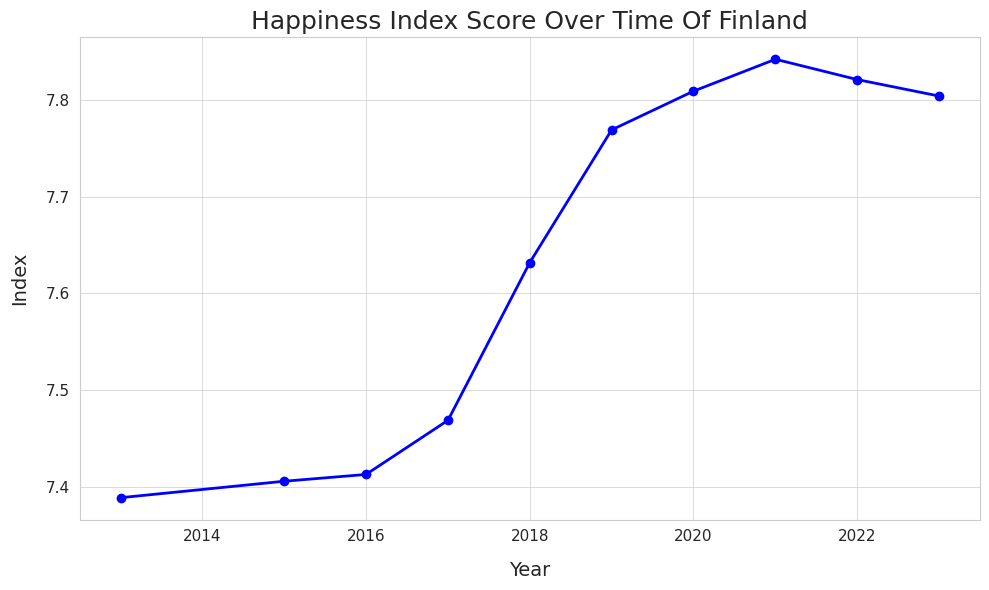

In [13]:
#Happiness index trends of Finland
world_index['Year'] = pd.to_datetime(world_index['Year'], format='%Y')
finland_data = world_index[world_index['Country'] == 'Finland']
plt.figure(figsize=(10, 6)) 
plt.plot(finland_data['Year'], finland_data['Index'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Year', fontsize=14, labelpad=12)  
plt.ylabel('Index', fontsize=14, labelpad=12)  
plt.title('Happiness Index Score Over Time Of Finland', fontsize=18) 
plt.grid(True, linewidth=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()  
plt.show()

Finland's happiness score saw a substantial increase starting in 2016 but has since declined from 2021. This decline may be attributed to potential influences from European events, such as the Russian-Ukraine war, as well as concerns related to economic and political matters.

> Happiness index rankings of Finland in 2013-2013

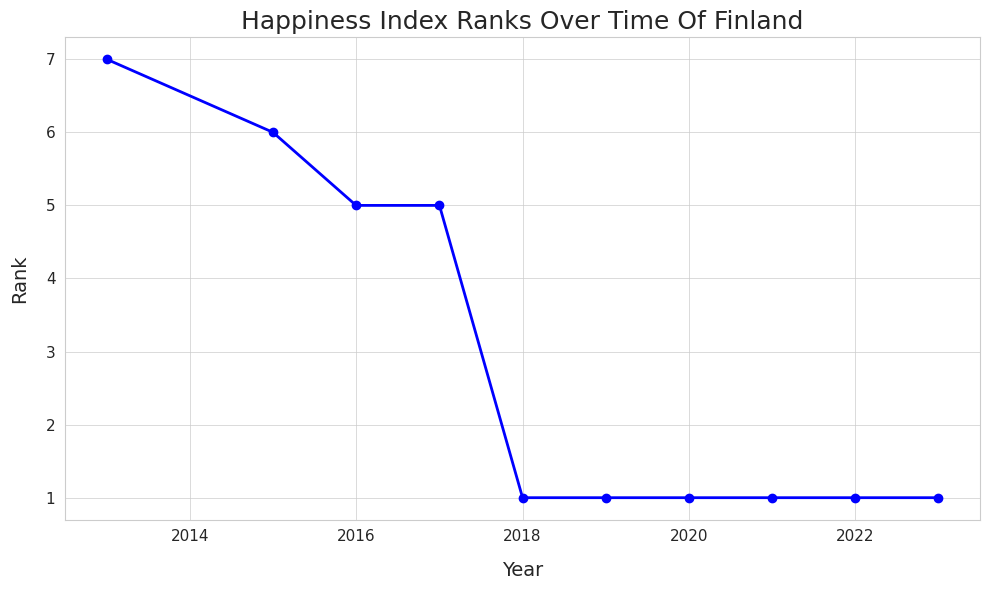

In [14]:
#Happiness index rankings of Finland
world_index['Year'] = pd.to_datetime(world_index['Year'], format='%Y')
finland_data = world_index[world_index['Country'] == 'Finland']
plt.figure(figsize=(10, 6)) 
plt.plot(finland_data['Year'], finland_data['Rank'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Rank', fontsize=14, labelpad=12) 
plt.title('Happiness Index Ranks Over Time Of Finland', fontsize=18)  
plt.grid(True, linewidth=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()  
plt.show()

From the 5th position in the index rankings in 2017 to the first in 2018, Finland has seen 5 years in a row being called the happiest country, looking forward to more years of Finland carrying the crown!

# Exploratory Data Analysis - A closer look at Happiness report in 2023

In [15]:
world_2023.head(5)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


> Adding Finland in perspective - top 10 happiest countries in 2023

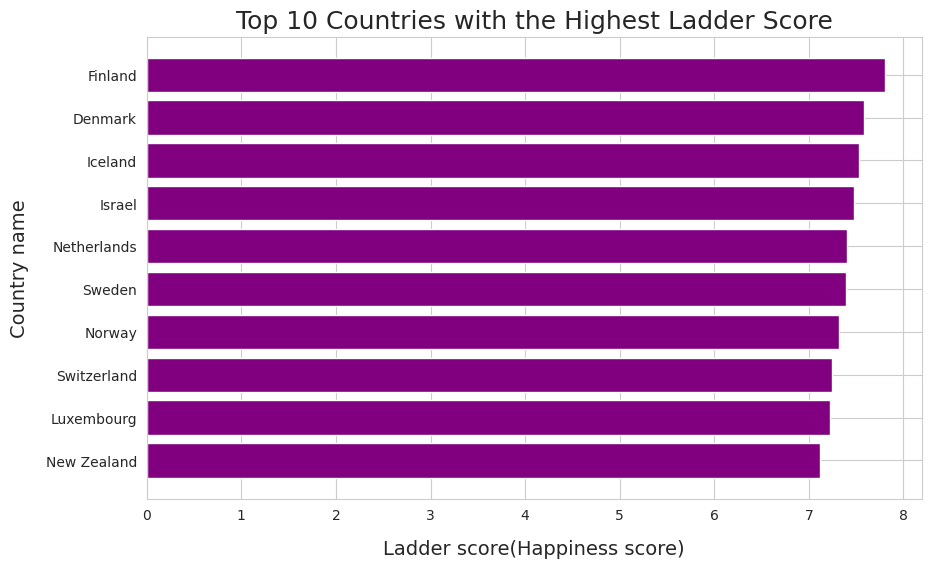

In [16]:
#top 10 countries with highest happiest score
top_10_countries = world_2023.sort_values("Ladder score", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries["Country name"], top_10_countries["Ladder score"], color="purple")
plt.xlabel("Ladder score(Happiness score)", fontsize=14, labelpad=12)
plt.ylabel("Country name", fontsize=14, labelpad=12)
plt.title("Top 10 Countries with the Highest Ladder Score", fontsize=18)
plt.gca().invert_yaxis()
plt.show()



Top 10 happiest countries include mainly countries in the EU, it's interesting also to see 2 neighbors of Finland, Sweden and Norway in the top list.

> Top 10 happiest countries with the score of key metrics

<Figure size 1200x800 with 0 Axes>

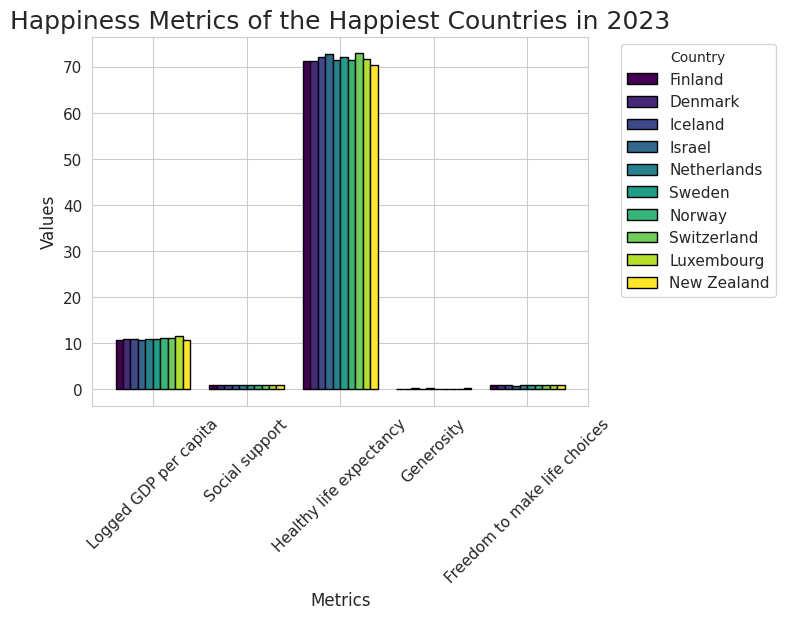

In [17]:
top_10_countries = world_2023.sort_values(by="Ladder score", ascending=False).head(10)
metrics = ["Logged GDP per capita", "Social support", "Healthy life expectancy", "Generosity", "Freedom to make life choices"]

# Extract data for the top 10 countries and selected metrics
top_10_data = top_10_countries[["Country name"] + metrics]
top_10_data = top_10_data.set_index("Country name").T

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
top_10_data.plot(kind="bar", width=0.8, colormap="viridis", edgecolor="black")
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Happiness Metrics of the Happiest Countries in 2023", fontsize=18)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

The top 10 happiest countries in 2023 have quite equal key metric values like GDP per capita, Social support, Life expectancy, etc. and Finland isn't the country with the highest GDP per capita or life expectancy out of these top 10.

> Distribution of ladder score (happiness score) across countries in 2023

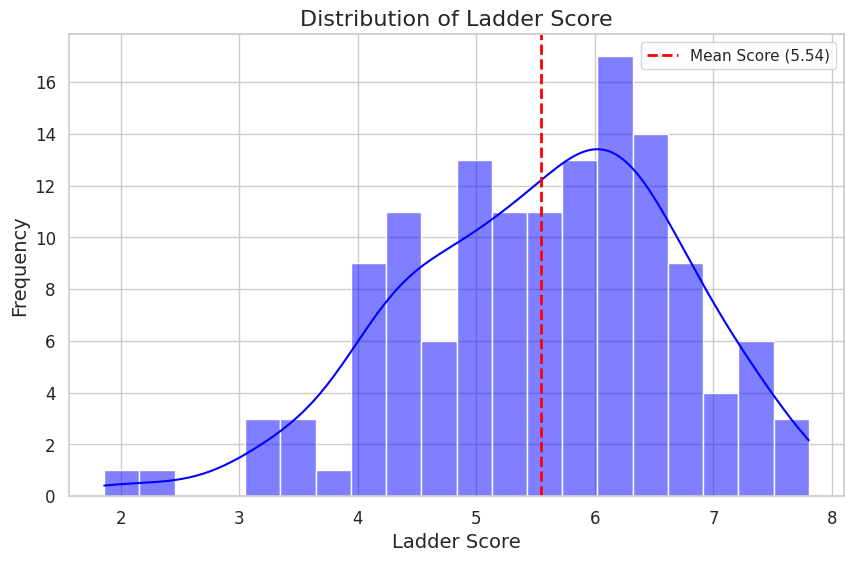

In [18]:
#Distibution of Ladder score
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=world_2023, x="Ladder score", bins=20, kde=True, color='blue')
plt.xlabel("Ladder Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Ladder Score", fontsize=16)
mean_score = world_2023["Ladder score"].mean()
plt.axvline(mean_score, color='red', linestyle='--', label=f"Mean Score ({mean_score:.2f})", linewidth=2)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The next part of the analysis is to reveal the correlation of each selected factor used to measure the happiness of a country and the happiness score itself.

> Correlation between GDP per capita and Happiness score

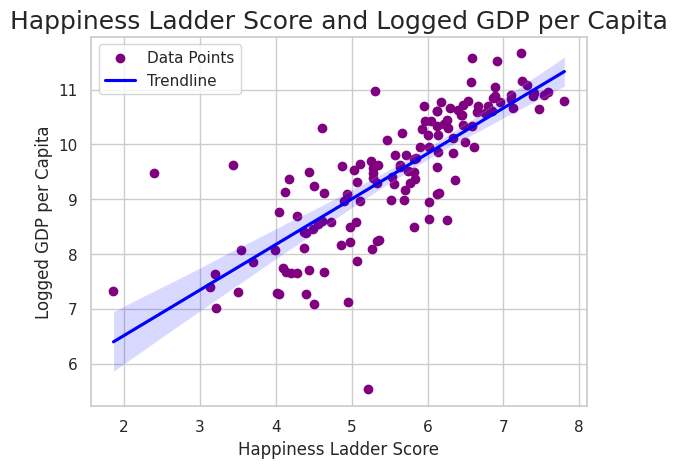

In [19]:
plt.scatter(world_2023["Ladder score"], world_2023["Logged GDP per capita"], color="purple", label="Data Points")
x = world_2023["Ladder score"]
y = world_2023["Logged GDP per capita"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
sns.regplot(x=x, y=y, color="blue", scatter=False, label="Trendline")
plt.title("Happiness Ladder Score and Logged GDP per Capita", fontsize=18)
plt.xlabel("Happiness Ladder Score")
plt.ylabel("Logged GDP per Capita")
plt.legend()
plt.show()

The regression lines indicate a strong correlation between GDP per capita and the overall happiness score, showing the significance of economic development in influencing happiness.

> Correlation between Social support and Happiness score

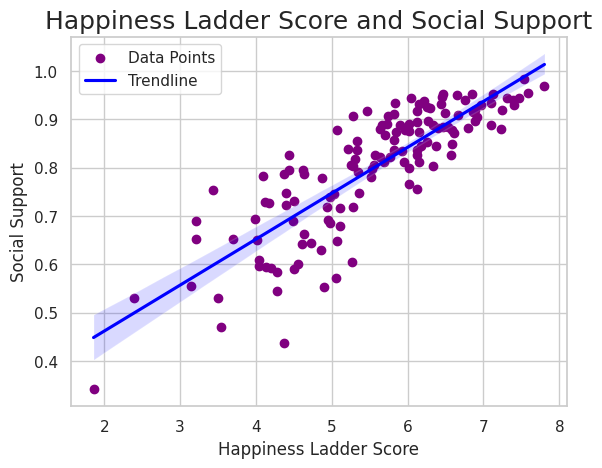

In [20]:
plt.scatter(world_2023["Ladder score"], world_2023["Social support"], color="purple", label="Data Points")
x = world_2023["Ladder score"]
y = world_2023["Social support"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
sns.regplot(x=x, y=y, color="blue", scatter=False, label="Trendline")
plt.title("Happiness Ladder Score and Social Support", fontsize=18)
plt.xlabel("Happiness Ladder Score")
plt.ylabel("Social Support")
plt.legend()
plt.show()

A positive correlation exists between Social support scores and Happiness scores. During challenging periods, the availability of support from one's social network becomes increasingly crucial, impacting the satisfaction and overall well-being of a country's residents.

> Correlation between Life expectancy and Happiness score

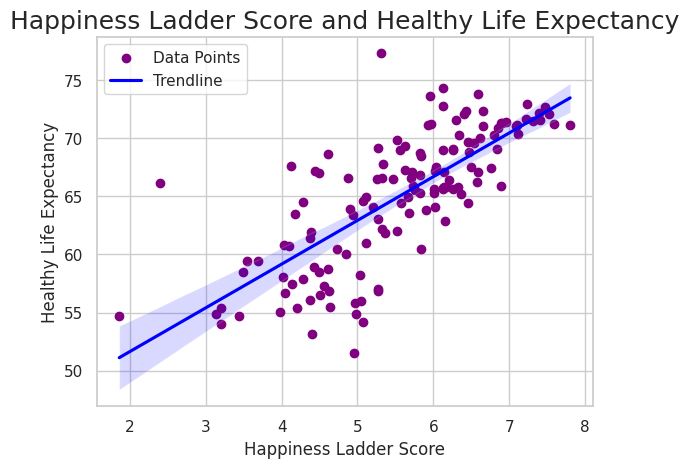

In [21]:
plt.scatter(world_2023["Ladder score"], world_2023["Healthy life expectancy"], color="purple", label="Data Points")
x = world_2023["Ladder score"]
y = world_2023["Healthy life expectancy"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
sns.regplot(x=x, y=y, color="blue", scatter=False, label="Trendline")
plt.title("Happiness Ladder Score and Healthy Life Expectancy", fontsize=18)
plt.xlabel("Happiness Ladder Score")
plt.ylabel("Healthy Life Expectancy")
plt.legend()
plt.show()

Life expectancy demonstrates a correlation with the Happiness score, and intriguingly, there are instances of countries having similar life expectancy levels yet exhibiting different ladder scores. This observation is supported by the earlier bar graph, which highlights that all the top 10 happiest countries have a life expectancy exceeding 70 years.

> Correlation between Freedom to make choices and Happiness score

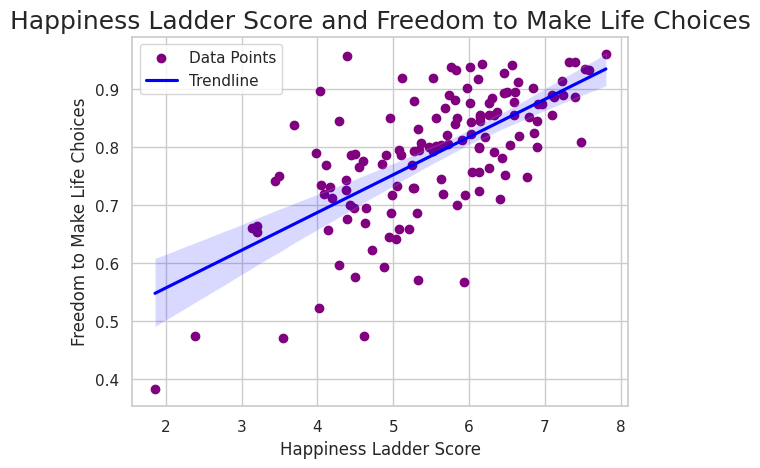

In [22]:
plt.scatter(world_2023["Ladder score"], world_2023["Freedom to make life choices"], color="purple", label="Data Points")
x = world_2023["Ladder score"]
y = world_2023["Freedom to make life choices"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
sns.regplot(x=x, y=y, color="blue", scatter=False, label="Trendline")
plt.title("Happiness Ladder Score and Freedom to Make Life Choices", fontsize=18)
plt.xlabel("Happiness Ladder Score")
plt.ylabel("Freedom to Make Life Choices")
plt.legend()
plt.show()

There is a relationship between the Freedom to make life choice metric and Happiness score but it's quite scattered and the correlation isn't very strong, however it's discernible that countries with higher Happiness score tend to have higher Freedom to make life choice scores.

> Correlation between Generosity and Happiness score

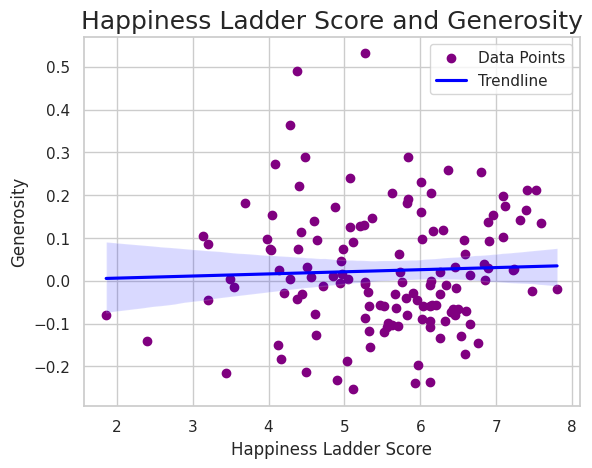

In [23]:
plt.scatter(world_2023["Ladder score"], world_2023["Generosity"], color="purple", label="Data Points")
x = world_2023["Ladder score"]
y = world_2023["Generosity"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
sns.regplot(x=x, y=y, color="blue", scatter=False, label="Trendline")
plt.title("Happiness Ladder Score and Generosity", fontsize=18)
plt.xlabel("Happiness Ladder Score")
plt.ylabel("Generosity")
plt.legend()
plt.show()

The scatter plot doesn't show any correlation between Generosity and Happiness score, all the dots are scattered and doesn't signify any trends or relationship between 2 variables.

> Correlation of all metrics and Happiness score

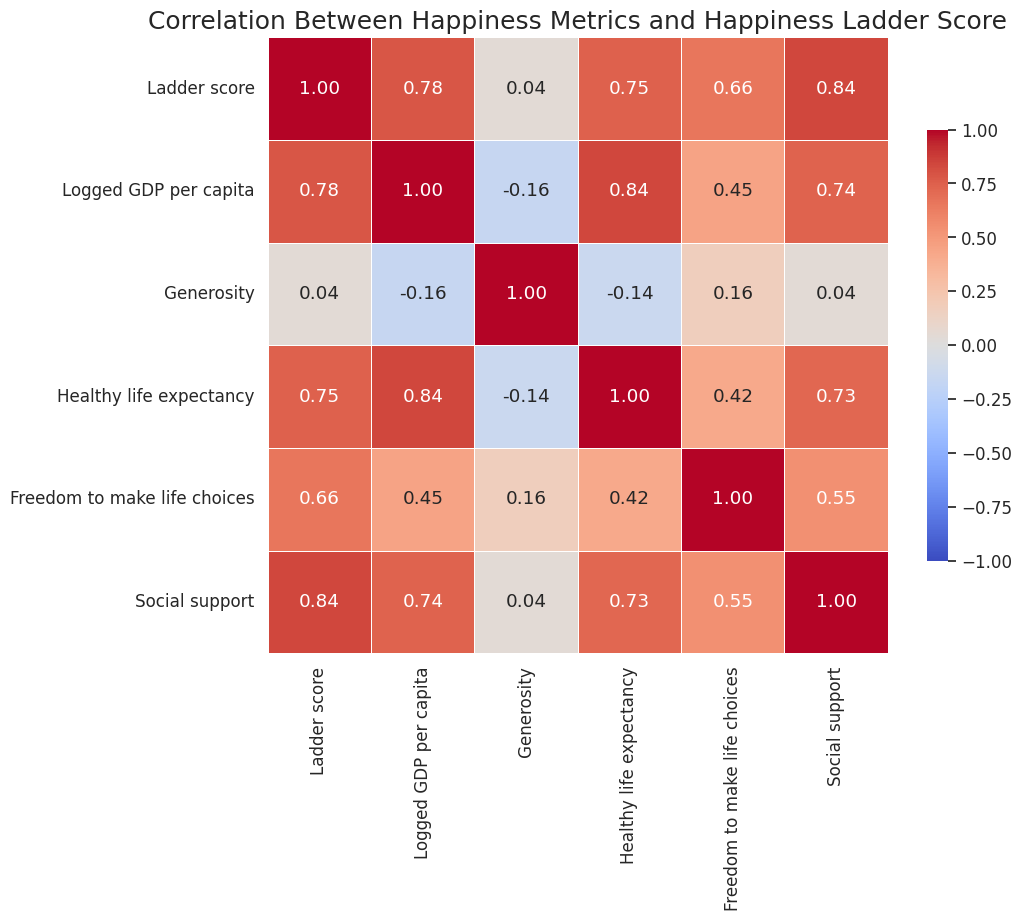

In [24]:
metrics = ["Ladder score", "Logged GDP per capita", "Generosity", "Healthy life expectancy", "Freedom to make life choices", "Social support"]
selected_data = world_2023[metrics]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)  
sns.set_style("whitegrid") 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.7})
plt.title("Correlation Between Happiness Metrics and Happiness Ladder Score", fontsize=18)
plt.show()

The heatmap draws the correlations between the specified metrics and Happiness "Ladder score." The values in the heatmap represent the correlation coefficients, which range from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation. Out of all metrics, GDP per capita and Life expectancy are the most positively correlated with the Happiness score, with correlation coefficients as 0.84 and 0.75 respectively.

# Summary 

The project uses analysis and visualization methods to reveal the trends of happiness score over the years and correlations between important metrics to the overall happiness level as well as happiness trends of Finland over the decade. The visualization shows some interesting findings:
* There are positive correlations between several key metrics and the Happiness score, notably "Logged GDP per capita," "Healthy life expectancy", "Social support", and "Freedom to make life choices". The correlation between "Generosity" and Happiness score appeared to be less pronounced, suggesting that the impact of generosity on happiness isn't very clear.
* The overall happiness score has increased significantly since 2017 dropping in 2023 but we might see a clearer trend when having a complete dataset at the end of 2023
* Finland's happiness score saw a substantial increase starting in 2016 and having exhibited the highest score since 2018 and being 5 years in a row being called the happiest country

In conclusion, this analysis project contributes to our understanding of the multifaceted nature of happiness and the factors that contribute to it. It underscores the importance of considering a range of well-being metrics when assessing and improving the quality of life for individuals and communities worldwide.